In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.sryle.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

AttributeError: module 'matplotlib.pyplot' has no attribute 'sryle'

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
data = boston.data

In [7]:
data.shape

(506, 13)

In [8]:
target = boston.target

In [10]:
feature_names = boston.feature_names

In [11]:
feature_names 

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
x =  pd.DataFrame (data, columns = feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
x.shape

(506, 13)

In [22]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [23]:
y = pd.DataFrame(target, columns = ['price'])

In [24]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [25]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


Разбивка данных на тренировачный и тестовый датасеты

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

Построение модели линейной регрессии

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression ()

In [29]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
y_pred = lr.predict(x_test)

In [33]:
check_test = pd.DataFrame({'y_test':y_test['price'],
                          'y_pred':y_pred.flatten()},
                         columns = ['y_test', 'y_pred'])

In [34]:
check_test.head(10)

,y_test,y_pred
173,23.6,28.838854
274,32.4,36.007833
491,13.6,15.083248
72,22.8,25.230909
452,16.1,18.878641
76,20.0,23.213983
316,17.8,17.593112
140,14.0,14.305081
471,19.6,23.054390
500,16.8,20.620083


Средняя квадратичная ошибка

In [37]:
from sklearn.metrics import mean_squared_error

In [39]:
initial_mse = mean_squared_error(y_test, y_pred)
initial_mse

22.098694827098036

Средняя обсалютная ошибка

In [40]:
from sklearn.metrics import mean_absolute_error

In [41]:
mean_absolute_error (y_test, y_pred)

3.060939595437034

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score (y_test, y_pred)

0.6844267283527123

Просмотр коэффициентов линейной регрессии

In [46]:
lr.intercept_

array([29.83642016])

In [47]:
lr.coef_

array([[-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,
         2.77350326e+00, -1.62388292e+01,  4.36875476e+00,
        -9.24808158e-03, -1.40086668e+00,  2.57761243e-01,
        -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]])

Text(0, 0.5, 'Признак')

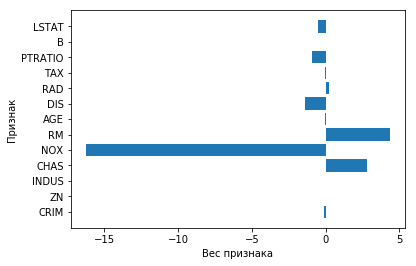

In [48]:
plt.barh (x_train.columns, lr.coef_.flatten())
plt.xlabel ('Вес признака')
plt.ylabel ('Признак')